In [24]:
import pandas as pd 
import numpy as np 


In [25]:
df = pd.read_csv('email.csv')
df.head(3)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...


## **Data Preprocessing**

In [26]:
df.describe()

,Category,Message
count,5573,5573
unique,3,5158
top,ham,"Sorry, I'll call later"
freq,4825,30


In [27]:
# Null Values
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5573 entries, 0 to 5572
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5573 non-null   object
 1   Message   5573 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [41]:
df["Category"] = df["Category"].astype('string')
df["Message"] = df["Message"].astype('string')

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   string
 1   Message   5572 non-null   string
dtypes: string(2)
memory usage: 87.2 KB


In [43]:
df.shape

(5572, 2)

In [44]:
df.tail(3)

,Category,Message
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [45]:
df.tail(3)

,Category,Message
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


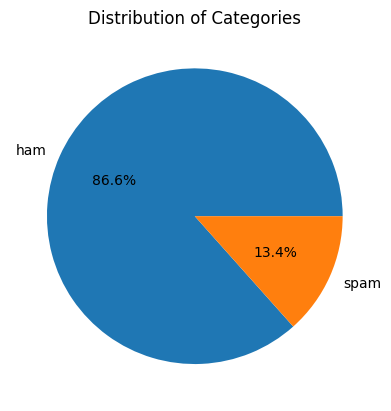

In [46]:
import matplotlib.pyplot as plt

# Assuming 'Category' is the column containing the categories in your DataFrame 'df'
viz = df['Category']

# Create a pie chart to visualize the distribution of categories
viz.value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Distribution of Categories')
plt.ylabel('')  # Remove the ylabel to make the plot cleaner
plt.show()


## **Modeling**

In this project, we will try to predict if an email is a span or not, so for that we will be using `Naive Bayes` as an algorithm for this problem.


In [47]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

### **Vectrorizing:**

**Convert dataframe column values into numerical values for training**

In [50]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Category'] = encoder.fit_transform(df['Category'])
df.head(4)

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...


### **Train/Test dataset:**

In [54]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df.Message, df.Category, test_size=0.25)

In [56]:
x_train.describe()

count                       4179
unique                      3938
top       Sorry, I'll call later
freq                          20
Name: Message, dtype: object

### **Vectorizing:**

In [58]:
# Find word counts && store data as matrix
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
x_train_count = cv.fit_transform(x_train.values)

In [59]:
x_train_count

<4179x7543 sparse matrix of type '<class 'numpy.int64'>'
	with 55841 stored elements in Compressed Sparse Row format>

**That means 7543 unique words that appeared all long the matrix columns**